<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/F2_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Normalization?

Normalization is a technique often applied as part of data preparation for machine learning algorithms. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values or losing information.

**Why is it important?**

Many machine learning algorithms perform better or converge faster when numerical input variables are scaled. For example, algorithms that use gradient descent (like linear regression, logistic regression, neural networks) often benefit from normalization because it ensures that all features contribute equally to the distance calculations. Tree-based algorithms (like Decision Trees, Random Forests, Gradient Boosting) are generally less sensitive to feature scaling.

**Common Normalization Techniques:**

1.  **Min-Max Scaling (Rescaling):** Scales features to a fixed range, usually 0 to 1. The formula is: `X_scaled = (X - X_min) / (X_max - X_min)`.
2.  **Standardization (Z-score normalization):** Scales features such that they have a mean of 0 and a standard deviation of 1 (unit variance). The formula is: `X_scaled = (X - μ) / σ`, where `μ` is the mean and `σ` is the standard deviation.

In this example, we'll use **Standardization**.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a sample DataFrame to demonstrate normalization
data = {
    'feature_1': np.random.rand(100) * 100, # Range from 0 to 100
    'feature_2': np.random.randint(0, 1000, 100), # Range from 0 to 999
    'feature_3': np.random.normal(50, 10, 100) # Normally distributed
}
df = pd.DataFrame(data)

print("Original DataFrame head:")
display(df.head())

print("Original DataFrame descriptive statistics:")
display(df.describe())

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical columns to normalize
# For this example, we'll normalize all three features
features_to_normalize = ['feature_1', 'feature_2', 'feature_3']

# Apply standardization to the selected features
df_scaled = df.copy()
df_scaled[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

print("\nDataFrame after Standardization (first 5 rows):")
display(df_scaled.head())

print("\nDescriptive statistics after Standardization:")
display(df_scaled.describe())

# You can see that after standardization, the mean of each feature is approximately 0 and the standard deviation is approximately 1.

Original DataFrame head:


,feature_1,feature_2,feature_3
0,92.123839,706,52.601918
1,15.771201,355,44.006058
2,99.224128,285,48.897073
3,67.143014,128,57.990227
4,77.026905,954,52.006633


Original DataFrame descriptive statistics:


,feature_1,feature_2,feature_3
count,100.000000,100.000000,100.000000
mean,54.831199,523.800000,49.638599
std,30.257256,307.169713,8.886296
min,0.401506,31.000000,29.605570
25%,27.008515,268.500000,43.818007
50%,57.414265,536.500000,49.071277
75%,80.825295,797.250000,54.607936
max,99.917726,995.000000,70.527008



DataFrame after Standardization (first 5 rows):


,feature_1,feature_2,feature_3
0,1.238728,0.596146,0.335151
1,-1.297433,-0.552302,-0.637039
2,1.474574,-0.781337,-0.083866
3,0.408954,-1.295030,0.944567
4,0.737262,1.407584,0.267824



Descriptive statistics after Standardization:


,feature_1,feature_2,feature_3
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,2.275957e-16,1.487699e-16,5.351275e-16
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.807960e+00,-1.612407e+00,-2.265730e+00
25%,-9.241701e-01,-8.353237e-01,-6.583075e-01
50%,8.580024e-02,4.155351e-02,-6.416400e-02
75%,8.634309e-01,8.947093e-01,5.620307e-01
max,1.497613e+00,1.541733e+00,2.362474e+00


### Min-Max Scaling (Rescaling)

Min-Max Scaling is a data normalization technique that transforms features to a fixed range, usually between 0 and 1. It achieves this by subtracting the minimum value of the feature and then dividing by the range (maximum value minus minimum value).

**When to use it?**
*   When you need features to be within a specific, bounded range.
*   It's often used in algorithms that are sensitive to the magnitude of features, such as K-Nearest Neighbors, neural networks, and support vector machines (SVMs) with RBF kernels.
*   It preserves the original distribution of the data, but scales it down.

**Formula:**

The formula for Min-Max Scaling is:

`X_scaled = (X - X_min) / (X_max - X_min)`

Where:
*   `X` is the original value of a feature.
*   `X_min` is the minimum value of that feature in the dataset.
*   `X_max` is the maximum value of that feature in the dataset.
*   `X_scaled` is the normalized value of the feature, which will be between 0 and 1 (or any specified range).

#📊 Step 1: Create Dataset (Height & Weight)

In [ ]:
import pandas as pd

data = {
    "Height_cm": [150, 155, 160, 165, 170, 175, 180, 185, 190, 195],
    "Weight_kg": [45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
}

df = pd.DataFrame(data)
print(df)


   Height_cm  Weight_kg
0        150         45
1        155         50
2        160         55
3        165         60
4        170         65
5        175         70
6        180         75
7        185         80
8        190         85
9        195         90


Apply Min-Max Scaling (Using Sklearn)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_values, columns=df.columns)

print(df_scaled)


   Height_cm  Weight_kg
0   0.000000   0.000000
1   0.111111   0.111111
2   0.222222   0.222222
3   0.333333   0.333333
4   0.444444   0.444444
5   0.555556   0.555556
6   0.666667   0.666667
7   0.777778   0.777778
8   0.888889   0.888889
9   1.000000   1.000000


In [ ]:
new_data = [[172, 68]]   # height=172cm, weight=68kg
new_scaled = scaler.transform(new_data)

print("Scaled New Data:", new_scaled)


Scaled New Data: [[0.48888889 0.51111111]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("wine.csv")

In [ ]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Malic Acid,Class_Label
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2.37,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,5.25,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,4.16,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,3.49,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2.55,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.59,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,5.33,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.15,0


In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'Malic Acid', 'Class_Label'],
      dtype='object')

In [ ]:
df = df[['Class_Label', 'alcohol', 'Malic Acid']]


In [ ]:
df.columns = ['Class_Label', 'alcohol', 'Malic Acid']


In [ ]:
print(df.head())
print(df.columns)


   Class_Label  alcohol  Malic Acid
0            1      8.8        2.37
1            1      9.5        5.25
2            1     10.1        4.16
3            1      9.9        3.49
4            1      9.9        1.28
Index(['Class_Label', 'alcohol', 'Malic Acid'], dtype='object')


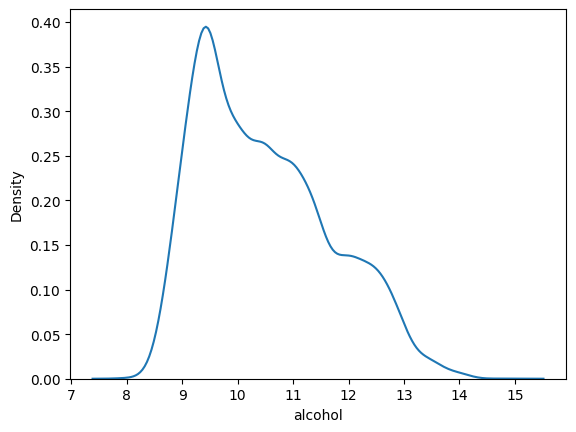

In [ ]:
sns.kdeplot(df['alcohol'])
plt.show()

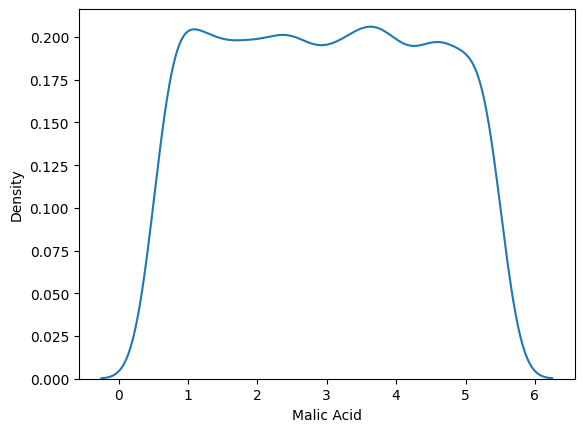

In [ ]:
sns.kdeplot(df['Malic Acid'])
plt.show()

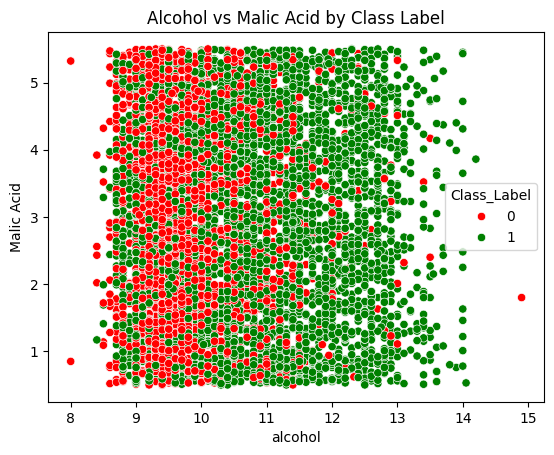

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color_dict = {0: 'red', 1: 'green'}

sns.scatterplot(
    x='alcohol',
    y='Malic Acid',
    hue='Class_Label',
    data=df,
    palette=color_dict
)

plt.title("Alcohol vs Malic Acid by Class Label")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class_Label', axis=1), df['Class_Label'], test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape

((5197, 2), (1300, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
np.round(X_train.describe(),1)

,alcohol,Malic Acid
count,5197.0,5197.0
mean,10.5,3.0
std,1.2,1.5
min,8.0,0.5
25%,9.5,1.7
50%,10.3,3.0
75%,11.3,4.2
max,14.9,5.5


In [ ]:
np.round(X_train_scaled.describe(),1)

,alcohol,Malic Acid
count,5197.0,5197.0
mean,0.4,0.5
std,0.2,0.3
min,0.0,0.0
25%,0.2,0.2
50%,0.3,0.5
75%,0.5,0.8
max,1.0,1.0


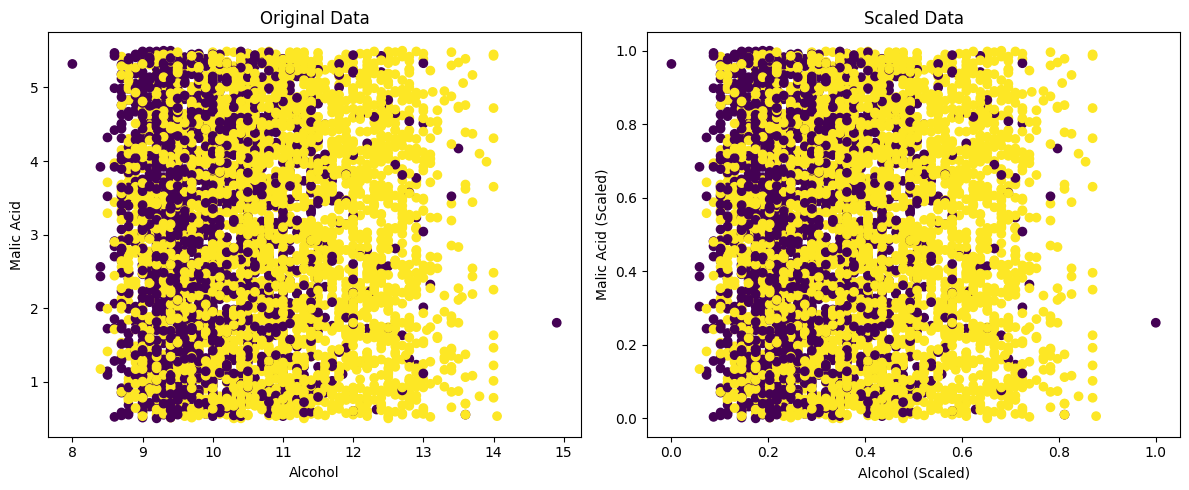

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Original Data
ax1.scatter(X_train['alcohol'], X_train['Malic Acid'], c=y_train)
ax1.set_title('Original Data')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')

# Scaled Data
ax2.scatter(X_train_scaled['alcohol'], X_train_scaled['Malic Acid'], c=y_train)
ax2.set_title('Scaled Data')
ax2.set_xlabel('Alcohol (Scaled)')
ax2.set_ylabel('Malic Acid (Scaled)')

plt.tight_layout()
plt.show()


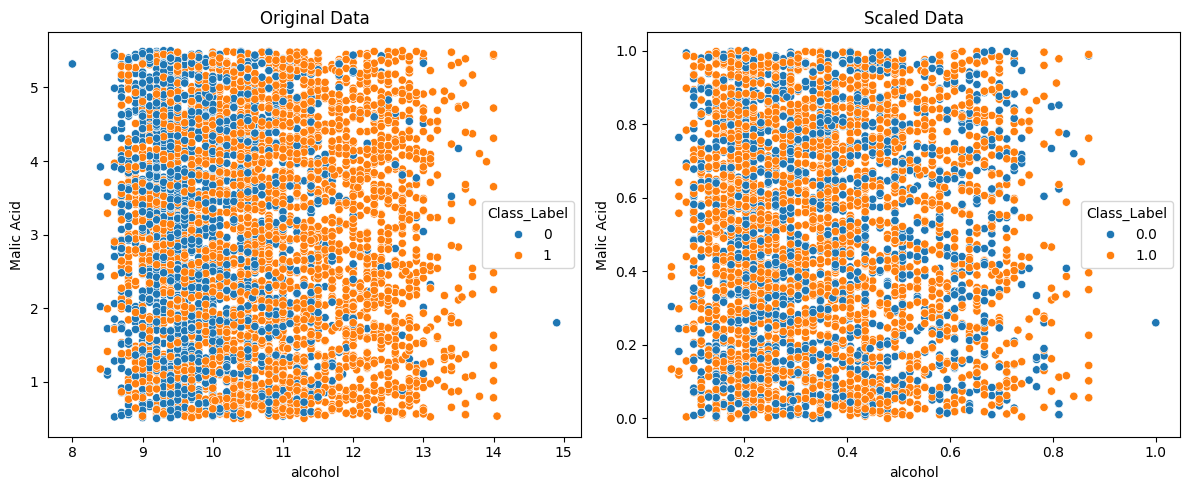

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.scatterplot(x='alcohol', y='Malic Acid', hue=y_train, data=X_train, ax=ax1)
ax1.set_title('Original Data')

sns.scatterplot(x='alcohol', y='Malic Acid', hue=y_train, data=X_train_scaled, ax=ax2)
ax2.set_title('Scaled Data')

plt.tight_layout()
plt.show()


#Load Data & Split

In [ ]:
# Keep only required columns
df = df[['Class_Label', 'alcohol', 'Malic Acid']]

X = df[['alcohol', 'Malic Acid']]
y = df['Class_Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Model WITHOUT Scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc_before = accuracy_score(y_test, y_pred)

print("Accuracy WITHOUT scaling:", acc_before)


Accuracy WITHOUT scaling: 0.6530769230769231


#Apply Scaling (MinMaxScaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Model WITH Scaling

In [ ]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_after = accuracy_score(y_test, y_pred_scaled)

print("Accuracy WITH scaling:", acc_after)


Accuracy WITH scaling: 0.6561538461538462


In [ ]:
print("=================================")
print("Accuracy Before Scaling:", acc_before)
print("Accuracy After Scaling: ", acc_after)
print("=================================")


Accuracy Before Scaling: 0.6530769230769231
Accuracy After Scaling:  0.6561538461538462


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Without scaling
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy WITHOUT scaling:", accuracy_score(y_test, y_pred))

# With scaling
svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
print("SVM Accuracy WITH scaling:", accuracy_score(y_test, y_pred_scaled))


SVM Accuracy WITHOUT scaling: 0.6984615384615385
SVM Accuracy WITH scaling: 0.6992307692307692


In [ ]:
# Artificially amplify alcohol feature
X_train_bad = X_train.copy()
X_test_bad = X_test.copy()

X_train_bad['alcohol'] = X_train_bad['alcohol'] * 1000
X_test_bad['alcohol'] = X_test_bad['alcohol'] * 1000


In [ ]:
# WITHOUT scaling (bad scale)
svm = SVC()
svm.fit(X_train_bad, y_train)
y_pred = svm.predict(X_test_bad)
print("SVM Accuracy WITHOUT scaling (bad scale):", accuracy_score(y_test, y_pred))


SVM Accuracy WITHOUT scaling (bad scale): 0.6976923076923077


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_bad_scaled = scaler.fit_transform(X_train_bad)
X_test_bad_scaled = scaler.transform(X_test_bad)

svm_scaled = SVC()
svm_scaled.fit(X_train_bad_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_bad_scaled)
print("SVM Accuracy WITH scaling (bad scale):", accuracy_score(y_test, y_pred_scaled))


SVM Accuracy WITH scaling (bad scale): 0.696923076923077


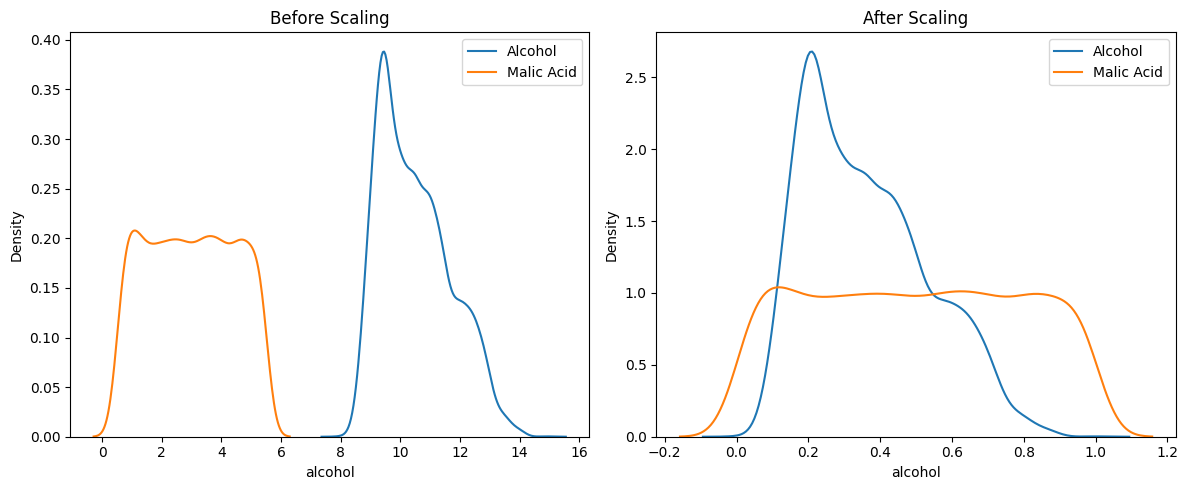

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert scaled array to DataFrame (IMPORTANT)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# -------- Before Scaling --------
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1, label='Alcohol')
sns.kdeplot(X_train['Malic Acid'], ax=ax1, label='Malic Acid')
ax1.legend()

# -------- After Scaling --------
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled_df['alcohol'], ax=ax2, label='Alcohol')
sns.kdeplot(X_train_scaled_df['Malic Acid'], ax=ax2, label='Malic Acid')
ax2.legend()

plt.tight_layout()
plt.show()


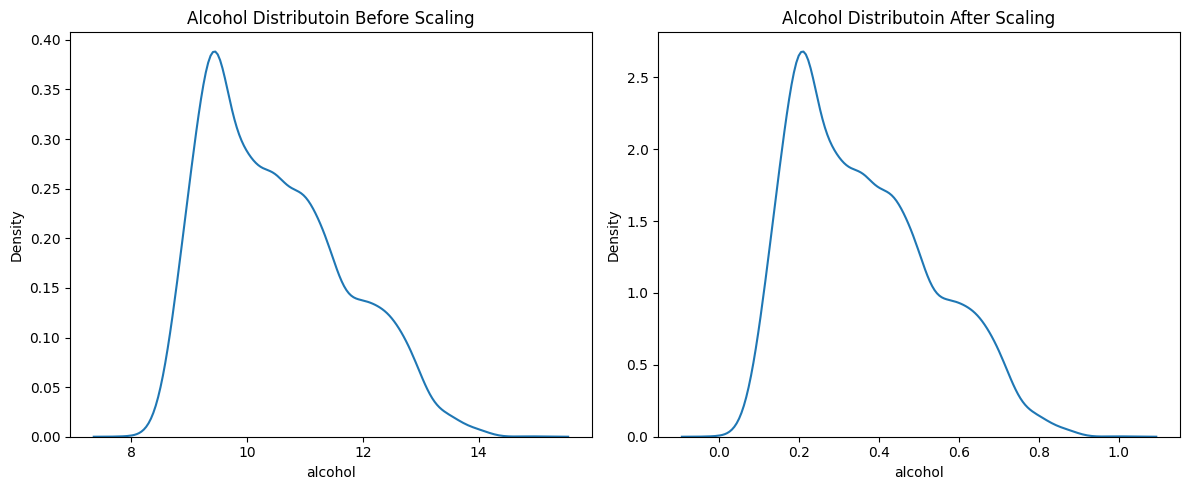

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title("Alcohol Distributoin Before Scaling")
sns.kdeplot(X_train['alcohol'], ax=ax1)

#after scaling
ax2.set_title("Alcohol Distributoin After Scaling")
sns.kdeplot(X_train_scaled_df['alcohol'], ax=ax2)

plt.tight_layout()
plt.show()

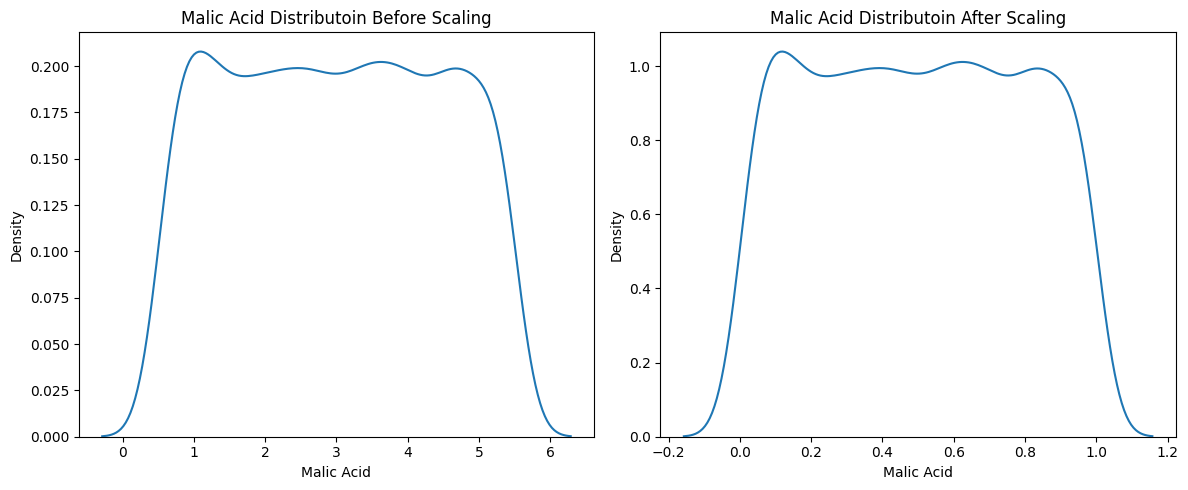

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before Scaling
ax1.set_title("Malic Acid Distributoin Before Scaling")
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

#After Scaling
ax2.set_title("Malic Acid Distributoin After Scaling")
sns.kdeplot(X_train_scaled_df['Malic Acid'], ax=ax2)

plt.tight_layout()
plt.show()

### Mean Normalization

Mean Normalization is a data scaling technique that centers the data around the mean, making the mean of the normalized data zero. It's similar to standardization but doesn't divide by the standard deviation.

The formula for Mean Normalization is:

`X_normalized = (X - X_mean) / (X_max - X_min)`

Where:
* `X` is the original value of a feature.
* `X_mean` is the mean value of that feature in the dataset.
* `X_max` is the maximum value of that feature in the dataset.
* `X_min` is the minimum value of that feature in the dataset.
* `X_normalized` is the normalized value of the feature, which will typically be in the range of -1 to 1, but not strictly bound like Min-Max Scaling.

**When to use it?**
* It's often used when you want to preserve the original distribution shape but still bring values to a similar scale and center them around zero.
* It can be beneficial for algorithms that are sensitive to the magnitude of features, similar to Min-Max Scaling, but when you want the mean to be zero.

### Apply Mean Normalization to the Wine Dataset

We will apply Mean Normalization to the `alcohol` and `Malic Acid` features in our `X_train` and `X_test` datasets. The parameters (mean, min, max) will be learned from the `X_train` set to prevent data leakage.

In [ ]:
import pandas as pd

# Calculate mean, min, and max from the training data (X_train)
X_mean = X_train.mean()
X_min = X_train.min()
X_max = X_train.max()

# Apply Mean Normalization to X_train
X_train_mean_scaled = (X_train - X_mean) / (X_max - X_min)

# Apply Mean Normalization to X_test using the parameters learned from X_train
X_test_mean_scaled = (X_test - X_mean) / (X_max - X_min)

print("X_train after Mean Normalization (first 5 rows):")
display(X_train_mean_scaled.head())

print("\nDescriptive statistics for X_train after Mean Normalization:")
display(np.round(X_train_mean_scaled.describe(), 3))

print("\nX_test after Mean Normalization (first 5 rows):")
display(X_test_mean_scaled.head())

print("\nDescriptive statistics for X_test after Mean Normalization:")
display(np.round(X_test_mean_scaled.describe(), 3))

X_train after Mean Normalization (first 5 rows):


,alcohol,Malic Acid
1916,-0.187486,0.387816
947,-0.071544,0.401816
877,-0.042558,0.159816
2927,0.218311,0.485816
6063,-0.158500,0.073816



Descriptive statistics for X_train after Mean Normalization:


,alcohol,Malic Acid
count,5197.000,5197.000
mean,-0.000,0.000
std,0.173,0.291
min,-0.361,-0.498
25%,-0.144,-0.252
50%,-0.028,-0.000
75%,0.117,0.252
max,0.639,0.502



X_test after Mean Normalization (first 5 rows):


,alcohol,Malic Acid
3103,0.203818,-0.064184
1419,0.044398,0.435816
4761,-0.201979,0.487816
4690,-0.216471,-0.128184
4032,-0.187486,-0.416184



Descriptive statistics for X_test after Mean Normalization:


,alcohol,Malic Acid
count,1300.000,1300.000
mean,-0.001,-0.006
std,0.173,0.284
min,-0.361,-0.498
25%,-0.144,-0.250
50%,-0.028,0.001
75%,0.117,0.238
max,0.537,0.502


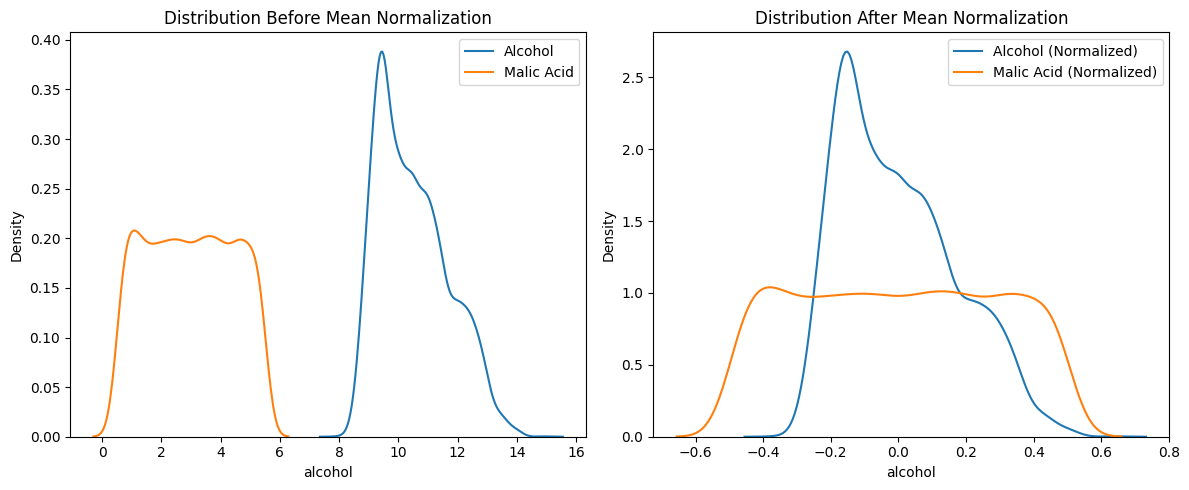

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Original Data
sns.kdeplot(X_train['alcohol'], ax=ax1, label='Alcohol')
sns.kdeplot(X_train['Malic Acid'], ax=ax1, label='Malic Acid')
ax1.set_title('Distribution Before Mean Normalization')
ax1.legend()

# Mean Normalized Data
sns.kdeplot(X_train_mean_scaled['alcohol'], ax=ax2, label='Alcohol (Normalized)')
sns.kdeplot(X_train_mean_scaled['Malic Acid'], ax=ax2, label='Malic Acid (Normalized)')
ax2.set_title('Distribution After Mean Normalization')
ax2.legend()

plt.tight_layout()
plt.show()

### Normalization vs. Standardization: When to Use Each

Both Normalization and Standardization are common techniques to scale numerical features, but they have distinct approaches and use cases:

**1. Normalization (Min-Max Scaling):**
*   **Formula:** `X_scaled = (X - X_min) / (X_max - X_min)`
*   **Outcome:** Scales features to a fixed range, typically between 0 and 1 (or -1 to 1 if there are negative values). It rescales the range of the features.
*   **Characteristics:**
    *   Sensitive to outliers. If there's an outlier, it will squash the majority of the data into a small range.
    *   Preserves the original distribution shape of the data.
*   **When to use it:**
    *   When an algorithm specifically requires input features to be within a certain bounded range (e.g., some neural network activation functions, image processing).
    *   When the data does **not** follow a Gaussian distribution.
    *   When you are dealing with algorithms that are not affected by magnitude differences, but by the relative order of values (e.g., K-Nearest Neighbors in some cases, although standardization is often preferred).

**2. Standardization (Z-score Normalization):**
*   **Formula:** `X_scaled = (X - μ) / σ` (where `μ` is the mean and `σ` is the standard deviation)
*   **Outcome:** Transforms features to have a mean of 0 and a standard deviation of 1. It centers the data around zero and scales it by the standard deviation.
*   **Characteristics:**
    *   Less affected by outliers than Min-Max Scaling, as it just scales the data without bounding it to a specific range. Outliers will still be present, but their relative impact on the scaling is different.
    *   Does **not** bound values to a specific range, so transformed data can have arbitrary minimum and maximum values.
    *   Useful when the data follows a Gaussian (normal) distribution, although it can be applied to non-Gaussian distributions too.
*   **When to use it:**
    *   When an algorithm assumes that the data is normally distributed (e.g., Linear Regression, Logistic Regression, Linear Discriminant Analysis).
    *   When the algorithm is sensitive to the scale of the features (e.g., Support Vector Machines, K-Means Clustering, Principal Component Analysis, regularized regressions).
    *   When you want to treat outliers more robustly than Min-Max scaling.
    *   It is generally a good default choice for many machine learning algorithms.

**Key Difference:**
*   Normalization (Min-Max) changes the range of your data.
*   Standardization (Z-score) changes the distribution of your data, making it centered around 0 with a unit standard deviation. It handles outliers better.

In general, if you are unsure which to use, Standardization is often a safer default choice, especially for algorithms that rely on distance calculations or assume some form of normality.